In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [2]:
(train_ds, train_labels), (test_ds, test_labels) = tfds.load("tf_flowers",
    split=["train[:70%]", "train[:30%]"],
    batch_size=-1,
    as_supervised=True,
)

2025-10-16 10:38:19.907255: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


In [3]:
train_ds[0].shape

TensorShape([442, 1024, 3])

In [4]:
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

In [5]:
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

In [6]:
train_labels[0]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 1., 0., 0.], dtype=float32)>

In [7]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [8]:
train_ds[0].shape

TensorShape([150, 150, 3])

In [9]:
import ssl
import certifi

ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())

In [10]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)

In [11]:
base_model.trainable = False

In [12]:
train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)

In [13]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [14]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [18]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

In [19]:
history=model.fit(train_ds, train_labels, epochs=5, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.5041 - loss: 2.0005 - val_accuracy: 0.5584 - val_loss: 1.3024
Epoch 2/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.7309 - loss: 0.7960 - val_accuracy: 0.6498 - val_loss: 1.0140
Epoch 3/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.8204 - loss: 0.5113 - val_accuracy: 0.6634 - val_loss: 1.0131
Epoch 4/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.8793 - loss: 0.3566 - val_accuracy: 0.6770 - val_loss: 0.9990
Epoch 5/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.9119 - loss: 0.2587 - val_accuracy: 0.6848 - val_loss: 1.1212


In [20]:
los,accurac=model.evaluate(test_ds,test_labels)
print("Loss: ",los,"Accuracy: ", accurac)

35/35 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9282 - loss: 0.2141
Loss:  0.21413566172122955 Accuracy:  0.9282470345497131


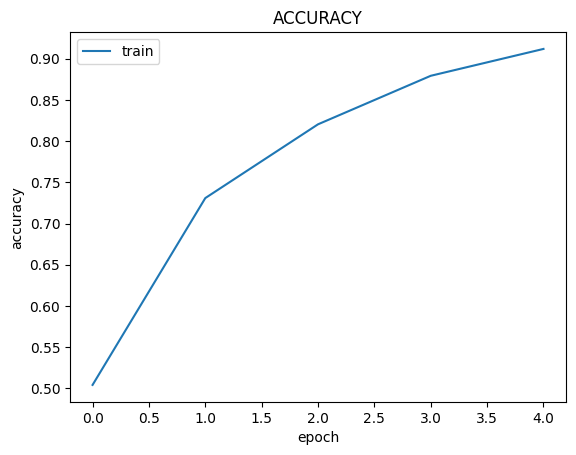

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('ACCURACY')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [25]:
y_pred = model.predict(test_ds)
y_classes = np.argmax(y_pred, axis=1)

35/35 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step


In [39]:
actual_classes = np.argmax(test_labels, axis=1)

In [40]:
dataset_info = tfds.builder("tf_flowers").info
class_names = dataset_info.features["label"].names
print(class_names)

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


In [44]:
for i in range(min(10, len(test_labels))):
    actual_label = class_names[actual_classes[i]]
    predicted_label = class_names[y_classes[i]]
    print(f"Sample {i+1}: Actual = {actual_label}, Predicted = {predicted_label}")

Sample 1: Actual = tulips, Predicted = tulips
Sample 2: Actual = sunflowers, Predicted = sunflowers
Sample 3: Actual = sunflowers, Predicted = sunflowers
Sample 4: Actual = roses, Predicted = dandelion
Sample 5: Actual = sunflowers, Predicted = sunflowers
Sample 6: Actual = dandelion, Predicted = dandelion
Sample 7: Actual = dandelion, Predicted = daisy
Sample 8: Actual = dandelion, Predicted = dandelion
Sample 9: Actual = dandelion, Predicted = dandelion
Sample 10: Actual = daisy, Predicted = daisy


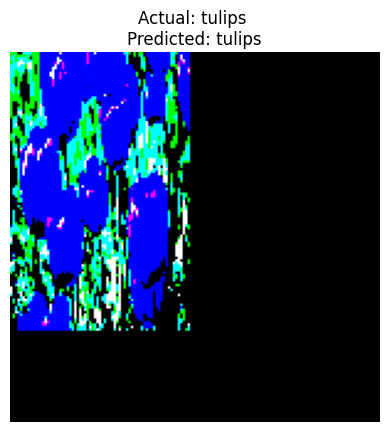

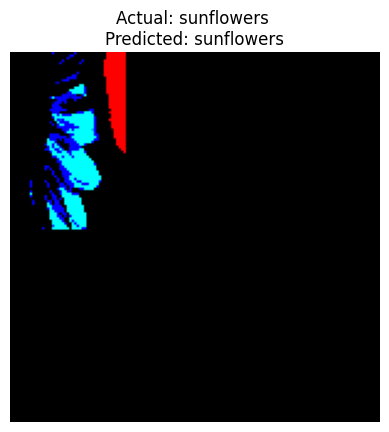

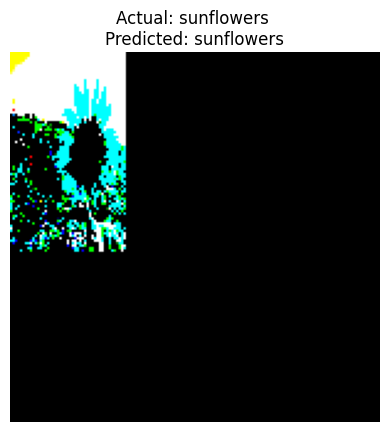

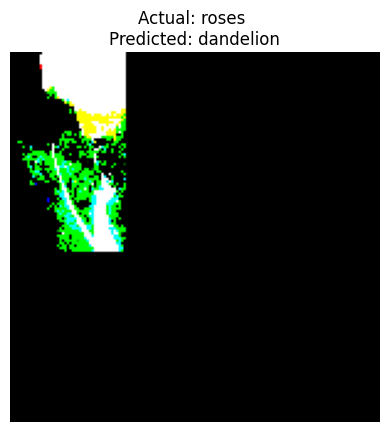

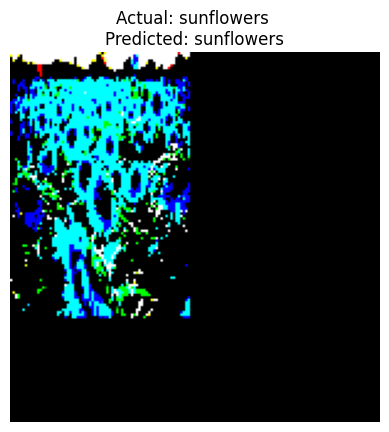

In [51]:
for i in range(5):
    plt.imshow(test_ds[i])
    actual_label = class_names[actual_classes[i]]
    plt.title(f"Actual: {actual_label} \nPredicted: {class_names[y_classes[i]]}")
    plt.axis("off")
    plt.show()